Python Assignment- Mohamamd Reza Zargar

First of all I import all libreries that I need for this assignment:

In [110]:
from Bio import SeqIO
from Bio.Data import CodonTable
import pandas as pd
from Bio.Data import CodonTable
from Bio.Seq import Seq
from Bio.SeqUtils.ProtParam import ProteinAnalysis
import numpy as np
import matplotlib.pyplot as plt

1. Document Dr. X's function with comments and with markdown text in your Jupyter notebook.

Function to Load DNA Sequences — `get_sequences_from_file(fasta_fn)`

This function loads DNA sequences from a FASTA file and stores them in a Python dictionary.

- **Purpose:** Reads penguin mitochondrial CytB gene sequences.
- **Input:** A string specifying the path to the FASTA file.
- **Output:** A dictionary with species names as keys (formatted as `"Genus species"`) and nucleotide sequences (as Bio.Seq.Seq objects) as values.
- **Assumption:** Each FASTA header line includes the species name as the 2nd and 3rd words (e.g., `>NC_000000 Aptenodytes forsteri...`)
- **Library used:** `Bio.SeqIO` from BioPython.

This function is provided by Dr. X and is foundational to the rest of the analysis.


In [114]:
from Bio import SeqIO

def get_sequences_from_file(fasta_fn):      
    """
    Extracts DNA sequences from a FASTA file and returns them as a dictionary.

    Parameters
    ----------
    fasta_fn : str
        Path to the FASTA file containing nucleotide sequences.

    Returns
    -------
    dict
        Dictionary where each key is a species name (formatted as 'Genus species'),
        and each value is the corresponding DNA sequence (as a Bio.Seq.Seq object).
    """
    sequence_data_dict = {}  # Create empty dictionary to store results
    
    for record in SeqIO.parse(fasta_fn, "fasta"):  # Iterate through each FASTA record
        description = record.description.split()  # Split header into words
        species_name = description[1] + " " + description[2]  # Extract "Genus species"
        sequence_data_dict[species_name] = record.seq  # Store species name and sequence
    
    return sequence_data_dict


2. Write a function that translates a string of nucleotides to amino acids based on Dr. X's pseudo-code suggestion.

In [117]:


def translate_nucleotides_manual(nuc_seq):
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
    aa_seq = ""

    seq_str = str(nuc_seq)  # Ensure it's a string for slicing
    for i in range(0, len(seq_str) - 2, 3):  # Loop over codons
        codon = seq_str[i:i+3]
        if codon in mito_table.stop_codons:
            break  # Stop translation if codon is a stop
        elif codon in mito_table.forward_table:
            aa_seq += mito_table.forward_table[codon]
        else:
            aa_seq += 'X'  # Unknown or invalid codon

    return aa_seq
translate_nucleotides_manual('ATGGCCCCAAATCTCCGAAAATCCCATCCCCTCCTAAAAATAATTAATAACTCC') #Example

'MAPNLRKSHPLLKMINNS'

3. Write an alternative translation function.

In [120]:
def translate_nucleotides_biopython(nuc_seq):
    seq_obj = Seq(str(nuc_seq))  # Convert to Seq if not already
    aa_seq = seq_obj.translate(table="Vertebrate Mitochondrial", to_stop=True)
    return str(aa_seq)
translate_nucleotides_biopython('ATGGCCCCAAATCTCCGAAAATCCCATCCCCTCCTAAAAATAATTAATAACTCC') #same example as 2

'MAPNLRKSHPLLKMINNS'

4. Write a function that calculates the molecular weight of each 3 amino acid sequence.

In [123]:


def compute_molecular_weight(aa_seq):
    clean_seq = aa_seq.replace("*", "")  # Remove stop symbols if present
    analysed_seq = ProteinAnalysis(clean_seq)
    return analysed_seq.molecular_weight()
    aa_example = "MAPNLRKSHPLLKMINNS"
compute_molecular_weight(aa_example)


2064.478

5. Write a function that computes the GC-content of each DNA sequence.

In [126]:
def compute_gc_content(dna_seq):
    seq_str = str(dna_seq).upper()
    g_count = seq_str.count("G")
    c_count = seq_str.count("C")
    valid_bases = sum(seq_str.count(base) for base in "ATGC")

    if valid_bases == 0:
        return 0.0  # Avoid division by zero

    gc_content = (g_count + c_count) / valid_bases * 100
    return gc_content
compute_gc_content("ATGGCCCCAAATCTCCGAAAATCCCATCCCCTCCTAAAAATAATTAATAACTCC")

40.74074074074074

6. Add two new columns to the penguin DataFrame: (1) molecular weight and (2) GC content

In [129]:

# Add new columns for molecular weight and GC content, initially empty
penguins_df = pd.read_csv("penguins_mass.csv")

penguins_df["molecular_weight"] = np.nan
penguins_df["gc_content"] = np.nan
print(penguins_df.head())  #check if it works

                   species   mass  molecular_weight  gc_content
0     Aptenodytes forsteri  28.00               NaN         NaN
1  Aptenodytes patagonicus  13.40               NaN         NaN
2      Eudyptes chrysocome   2.80               NaN         NaN
3    Eudyptes chrysolophus   4.50               NaN         NaN
4        Eudyptes sclateri   4.25               NaN         NaN


7. Call your functions from step 3 (or step 2) and step 4 and fill in the new columns in the DataFrame.

In [132]:
# Loop through each species in the DataFrame

cytb_seqs = get_sequences_from_file("penguins_cytb.fasta")

for idx, row in penguins_df.iterrows():
    species = row['species']
    
    if species in cytb_seqs:
        dna_seq = cytb_seqs[species]
        
        # Translate the DNA sequence to amino acids (choose preferred function)
        aa_seq = translate_nucleotides_biopython(dna_seq)
        
        # Compute molecular weight and GC content
        mol_weight = compute_molecular_weight(aa_seq)
        gc_percent = compute_gc_content(dna_seq)

        # Update the DataFrame
        penguins_df.at[idx, 'molecular_weight'] = mol_weight
        penguins_df.at[idx, 'gc_content'] = gc_percent
    else:
        print(f"Warning: No sequence found for {species}")
print(penguins_df.head())  #check if it works

                   species   mass  molecular_weight  gc_content
0     Aptenodytes forsteri  28.00        42459.6021   48.381452
1  Aptenodytes patagonicus  13.40        42563.7067   49.693788
2      Eudyptes chrysocome   2.80        42475.5753   51.181102
3    Eudyptes chrysolophus   4.50        42445.5493   50.918635
4        Eudyptes sclateri   4.25        42475.5753   50.831146


8. Plot a bar-chart of adult body mass per species. In your description of the graph, provide text that answers two questions

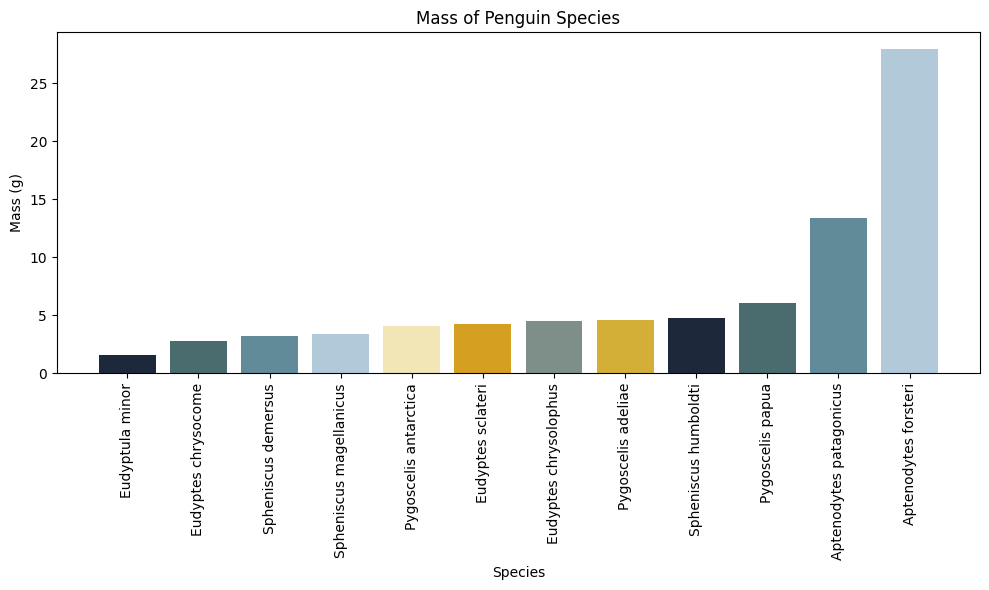

In [135]:
# Sort the DataFrame by mass in ascending order to find the smallest species easily
sorted_df = penguins_df.sort_values(by='mass')

# Lord of the Rings–inspired color palette (why not have fun with it!)
lotr_palette = ["#1D283A", "#4A6C6F", "#628B99", "#B2C9D9", "#F2E6B6", "#D5A021", "#7E8F89", "#D4AF37"]

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(sorted_df['species'], sorted_df['mass'], color=lotr_palette)
plt.xlabel('Species')
plt.ylabel('Mass (g)')
plt.title('Mass of Penguin Species')
plt.xticks(rotation=90)  # Rotate species names vertically to prevent label overlap
plt.tight_layout()
plt.show()


Q1: What is the smallest penguin species?

The smallest species shown is Eudyptula minor, commonly known as the Little Blue Penguin or Fairy Penguin.


Q2: What is the geographical range of this species?

Eudyptula minor is found along the southern coast of Australia and across New Zealand. They typically inhabit coastal areas, nesting in burrows or under vegetation close to shore.

9. Plot a graph that shows the molecular weight as a function of GC content. 

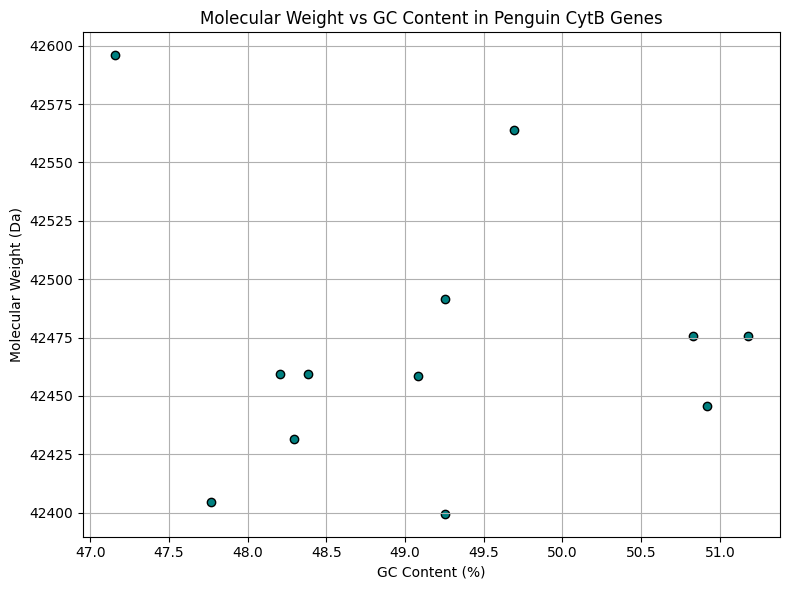

In [139]:
import matplotlib.pyplot as plt

# Drop rows with missing data just in case
filtered_df = penguins_df.dropna(subset=['molecular_weight', 'gc_content'])

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(filtered_df['gc_content'], filtered_df['molecular_weight'], color='teal', edgecolor='black')

# Add labels and title
plt.xlabel("GC Content (%)")
plt.ylabel("Molecular Weight (Da)")
plt.title("Molecular Weight vs GC Content in Penguin CytB Genes")
plt.grid(True)
plt.tight_layout()
plt.show()


10. Write the entire DataFrame to a new CSV file that includes your new columns.

In [142]:
# Save the updated DataFrame to a CSV file
penguins_df.to_csv("penguins_mass_cytb.csv", index=False)


11. BONUS: What other visualizations, functions or tasks would you do with this dataset? Add something interesting for fun

 GC Content vs Mass, colored by Molecular Weight, This combines all three biological traits (mass, GC content, and molecular weight) into one intuitive scatter plot.

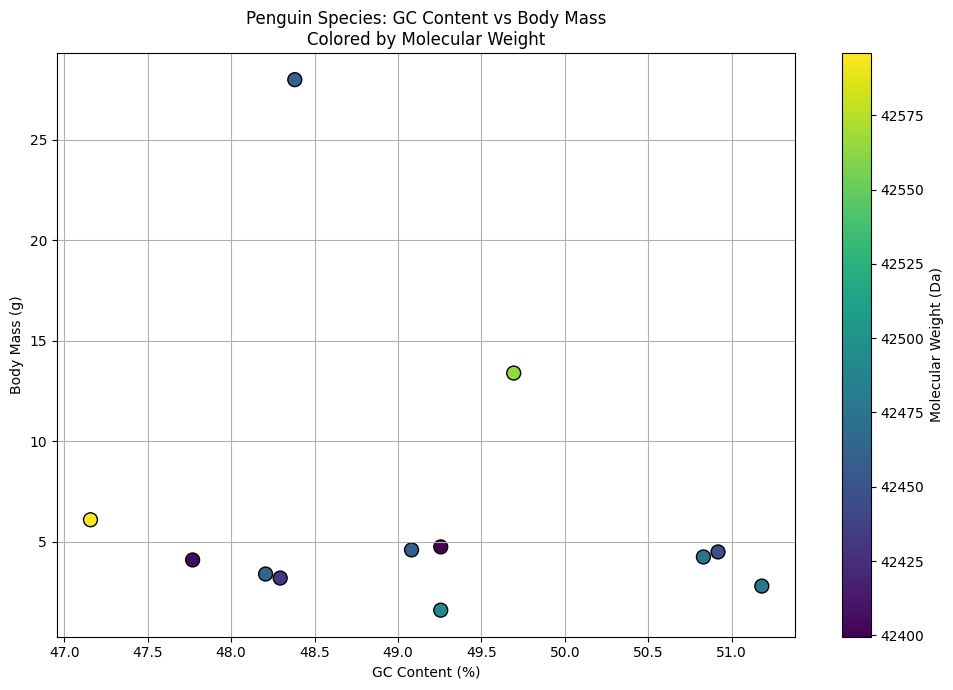

In [146]:


# Ensure no missing values
bonus_df = penguins_df.dropna(subset=['gc_content', 'mass', 'molecular_weight'])

# Create scatter plot
plt.figure(figsize=(10, 7))
scatter = plt.scatter(
    bonus_df['gc_content'],
    bonus_df['mass'],
    c=bonus_df['molecular_weight'],
    cmap='viridis',
    edgecolor='black',
    s=100
)

# Add color bar legend
cbar = plt.colorbar(scatter)
cbar.set_label('Molecular Weight (Da)')

# Add labels
plt.xlabel("GC Content (%)")
plt.ylabel("Body Mass (g)")
plt.title("Penguin Species: GC Content vs Body Mass\nColored by Molecular Weight")
plt.grid(True)
plt.tight_layout()
plt.show()
